### Imports

In [1]:
import os
import math

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()

In [2]:
import mixtureofconcave as subm
import determinantal as logsubm
import plottingtools

---

### A log-submodular function : DPP

In [ ]:
n = 50
m = 200
k = 10

np.random.seed(0)
X = np.random.random((n, m))

K = X @ X.transpose()
ground = np.linalg.det(K)

In [ ]:
S, objectives = logsubm.greedygains_logsubmod(None, X, k)

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plottingtools.objplot(objectives, ground, "mediumvioletred")
plt.subplot(1,2,2)
plottingtools.logobjplot(objectives, ground, "purple", "midnightblue")

In [ ]:
for oo in objectives: print("{:.3f}".format(oo))

---

### A submodular function : a weighted mixture of m(A)^{0.2}

In [ ]:
n = 50
m = 200
k = 10

np.random.seed(0)
X = np.random.random((n, m))
mixw = np.random.random(m); mixw = mixw/np.max(mixw)

ground = np.dot(mixw, np.sum(X, axis=0)**0.2)

In [ ]:
S, objectives = subm.greedygains_submod(None, X, mixw, k)

In [ ]:
plt.figure(figsize=(5,5))
plottingtools.objplot(objectives, ground, "seagreen", "darkolivegreen")

In [ ]:
for oo in objectives: print("{:.3f}".format(oo))

---

### DPP v/s Submodular

In [ ]:
n = 500
m = 72
k = 25

np.random.seed(0)
X = np.random.random((n, m))

np.random.seed(1)
mixw = np.random.random(m); mixw = mixw/np.max(mixw)

In [ ]:
S_d, objectives_d = logsubm.greedygains_logsubmod(None, X, k)

In [ ]:
S_s, objectives_s = subm.greedygains_submod(None, X, mixw, k)

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plottingtools.viztsne(X, S_d, "purple", "DPP", 30)
plt.subplot(1,2,2)
plottingtools.viztsne(X, S_s, "seagreen", "SPP", 30)

---

### Greedy v/s WeightedGreedy

Compare:<br>
Feasibility, output quality, computational complexity.

---

<p style="background-color:#ff9933">
Constrained Submodular Max with Discrete Membership Quota
</p>

#ccff66 #ff99cc #ff9933

Things to look out for:<br>
1. More number of groups <--> more constraint on maximizing w.r.t. one group
2. Having the groups correlating with features <--> making some group sinherently _better_ <--> making the quotas output worser solutions maybe.

In [13]:
n_samples = 200
m_features = 72
k_budget = 60

np.random.seed(0)
X = np.random.random((n_samples, m_features))

np.random.seed(1)
mixw = np.random.random(m_features); mixw = mixw/np.max(mixw)

In [14]:
p_groups = 25
#memcolors = ["steelblue", "lightsteelblue", "lightskyblue", "lightslategrey", "dodgerblue", "deepskyblue", "turquoise", "aquamarine", "lightseagreen", "mediumaquamarine"]
memcolors = np.array(["#11{:02X}dd".format(pp) for pp in np.arange(0, 256, 256//p_groups)])

Memvec = np.eye(p_groups)[np.random.choice(p_groups, n_samples)]
quo = np.ones(p_groups)*2

In [16]:
print([len(np.argwhere(Memvec[:,jj])) for jj in range(p_groups)])

[13, 4, 9, 6, 6, 6, 6, 11, 4, 7, 11, 4, 6, 12, 7, 8, 9, 11, 7, 11, 11, 6, 10, 6, 9]


In [17]:
S_s, objectives_s = subm.greedygains_submod(None, X, mixw, k_budget)

In [18]:
S_sq, objectives_sq = subm.greedyquota_submod(None, X, mixw, Memvec, quo, k_budget)

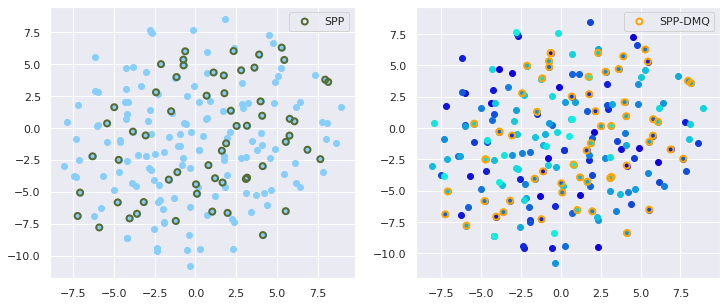

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plottingtools.viztsne(X, S_s, "darkolivegreen", "SPP", 30)
plt.subplot(1,2,2)
#plottingtools.
plottingtools.viztsne_DMQ(X, Memvec, memcolors, S_sq, "orange", "SPP-DMQ", 30)

In [20]:
objectives_s[-1], objectives_sq[-1]

(67.12713298063687, 67.20263978670035)

In [21]:
S_s, S_sq

(array([ 21, 135, 156, 179,  37,  95, 164,  75, 178,  20, 175,  77, 177,
         30, 101,  36, 117,  25, 102,  24,  46,  15,  89, 184, 146, 119,
         35, 112,  18, 136,  57,  12,  73, 190,  76,  34,  16,  40,  67,
          8, 160,  83, 150,  62, 129,  80, 125, 137, 147, 189, 162,   7,
         87, 145, 139, 134,  58, 132,  52,  31]),
 array([ 21, 135,  21, 164, 156, 179, 178,  75,  95,  37, 179,  20, 175,
         77, 177,  30, 101,  36, 117,  25, 102,  24, 117,  46, 184,  15,
         12,  89, 146,  35, 119, 112,  18, 136,  57,  73, 190,  76,  34,
         40,  67,  16, 160,   8,  83, 150,  62, 129,  80, 125, 147, 137,
        162,   7,  87, 189, 145, 134, 139,  58]))

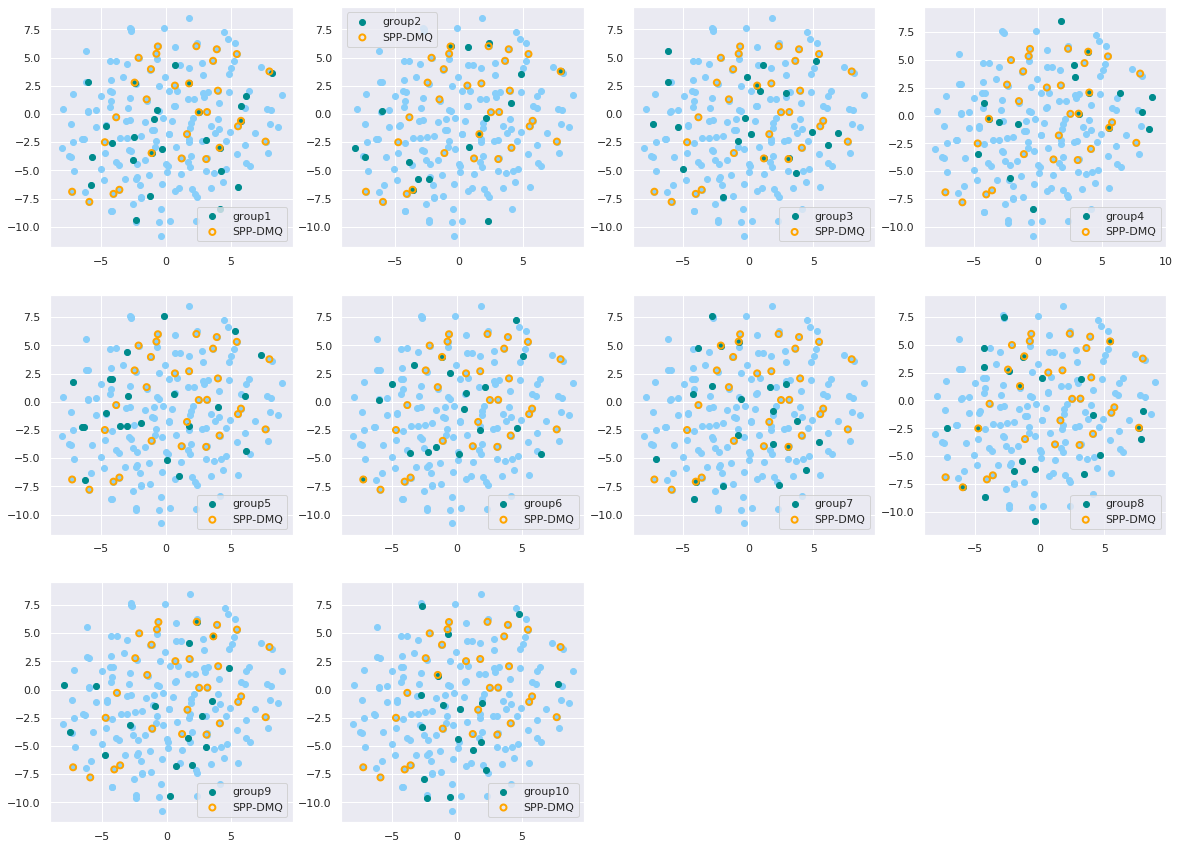

In [12]:
viztsne_IMQ(X, Memvec, ["lightskyblue", "darkcyan"], 3, S_sq, "orange", "SPP-DMQ", 30)

---

In [ ]:
print(objectives_s)
print(objectives_sq)

In [11]:
def viztsne_IMQ(X, Memvec, memcolors, figrows, S, setcolor, setlabel, perp):
    """ Given an nxm feature matrix X
        A selection of indices S of size k < n
        An n x p Membership matrix for p groups
        Plot the selection's 2d TSNE
    """
    
    [n,m] = X.shape
    p = Memvec.shape[1]
    
    Xemb = TSNE(n_components=2, random_state=256).fit_transform(X)
    
    plt.figure(figsize=((p//figrows+1)*5, figrows*5))
    for jj in range(p):
        plt.subplot(figrows,p//figrows+1,jj+1)
        plt.scatter(Xemb[:,0], Xemb[:,1], c=memcolors[0])
        
        memgrp = np.argwhere(Memvec[:,jj])
        plt.scatter(Xemb[memgrp,0], Xemb[memgrp,1], c=memcolors[1], label="group{}".format(jj+1))
        
        plt.scatter(Xemb[S,0], Xemb[S,1], facecolors="none", edgecolors=setcolor, linewidth=2, label=setlabel)
        plt.legend()